In [1]:
from __future__ import print_function
import os
import sys
import cv2
from matplotlib import pyplot as plt

from local_config import CURRENT_DIR
sys.path.append(os.path.join(CURRENT_DIR, ".."))
try:
    from config import Config
    from data_loader import KittiStixelDataset
except:
    print("failed to load module")

In [2]:
from albumentations import (
    Compose, HorizontalFlip, CLAHE, HueSaturationValue,
    RandomBrightness, RandomContrast, RandomGamma,
    ToFloat, ShiftScaleRotate
)

AUGMENTATIONS_TRAIN = Compose([
    RandomContrast(limit=0.2, p=0.5),
    RandomGamma(gamma_limit=(80, 120), p=0.5),
    RandomBrightness(limit=0.2, p=0.5),
    HueSaturationValue(hue_shift_limit=5, sat_shift_limit=20,
                       val_shift_limit=10, p=.9),
    CLAHE(p=1.0, clip_limit=2.0)])

In [3]:
dt_config = Config()
stixel_dataset = KittiStixelDataset(data_path=dt_config.DATA_PATH, ground_truth_path=dt_config.GROUND_TRUTH_PATH, transform=AUGMENTATIONS_TRAIN)

True

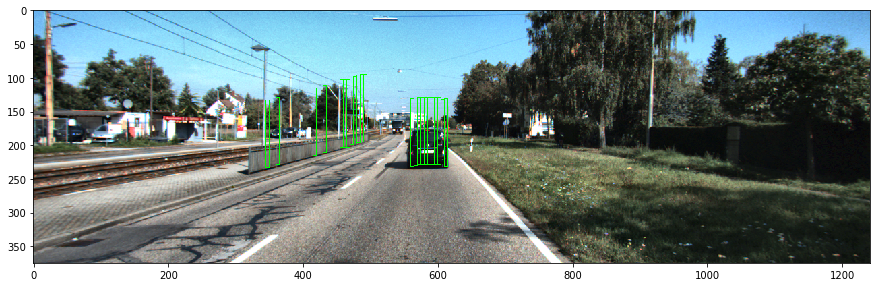

In [4]:
idx = 10

imgs, positions = stixel_dataset[idx]

visualized_stixel = stixel_dataset.visualize_one_image(idx)

plt.figure(figsize=(15,15))
plt.imshow(cv2.cvtColor(visualized_stixel, cv2.COLOR_BGR2RGB))
cv2.imwrite("test.jpg", visualized_stixel)

In [5]:
print(positions[:,:,1][0])

[ 0.50999999  0.50999999  0.50999999  0.50999999  0.50999999  0.50999999
  0.50999999  0.50999999  0.50999999  0.50999999  0.50999999  0.50999999
  0.50999999  0.50999999  0.50999999  0.50999999  0.50999999  0.50999999
  0.50999999  0.50999999  0.50999999  0.50999999  0.50999999  0.50999999
  0.50999999  0.50999999  0.50999999 31.06666756 30.53333473  0.50999999
  0.50999999  0.50999999  0.50999999 28.66666603 28.13333321  0.50999999
 27.06666565 26.79999924 26.26666641 26.          0.50999999  0.50999999
  0.50999999  0.50999999  0.50999999 30.63333321 30.53333473 30.53333473
 30.73333359 30.79999924  0.50999999  0.50999999  0.50999999  0.50999999
  0.50999999  0.50999999  0.50999999  0.50999999  0.50999999  0.50999999
  0.50999999  0.50999999  0.50999999  0.50999999  0.50999999  0.50999999
  0.50999999  0.50999999  0.50999999  0.50999999  0.50999999  0.50999999
  0.50999999  0.50999999  0.50999999  0.50999999  0.50999999  0.50999999
  0.50999999  0.50999999  0.50999999  0.50999999  0

In [6]:
len(stixel_dataset)

196